Linking of Google Colab and account


In [42]:
from google.colab import auth
auth.authenticate_user()
print("Authenticated")

Authenticated


In [43]:
from google.colab import files


In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 125 kB/s 


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id="homework00" 
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = tirupativenkatasrisairama.penmatsa@sjsu.edu

Your active configuration is: [default]


To take a quick anonymous survey, run:
  $ gcloud survey



In [ ]:
!gcloud config set project 'homework00'

Updated property [core/project].


In [ ]:
!gcloud config list project

[core]
project = homework00

Your active configuration is: [default]


In [ ]:
from google.cloud import bigquery
project_id="homework00" 
client=bigquery.Client(project=project_id)
for dataset in client.list_datasets():
  print(dataset.dataset_id)

netflix


In [ ]:
sql = """
SELECT * FROM 
`homework00.netflix.dataset`

"""

In [ ]:
dfquery=client.query(sql)

In [ ]:
df_init=dfquery.to_dataframe()

In [ ]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_init.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,None,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
1,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,None,"Oprah Winfrey, Ava DuVernay",None,"January 26, 2017",2017,None,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2,s7313,TV Show,Little Lunch,None,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,None,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3,s6828,TV Show,Gargantia on the Verdurous Planet,None,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,None,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Cleaning the Data 

In [ ]:
df_init=df_init.rename(columns={"listed_in":"genres"})

In [ ]:
df_init.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
genres          8807
description     8807
dtype: int64

Lets find out the distribution of Content on netflix 

In [ ]:
distri=df_init["type"].value_counts()

types=["Movie","TV Show"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

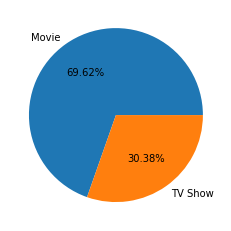

In [47]:
plt.pie(distri,labels=types,autopct='%1.2f%%')
plt.savefig("tv_movie_distri.jpeg",bbox_inches="tight",dpi=1600)
files.download("tv_movie_distri.jpeg")
plt.show()

The below code gives us no of NA values per each column

In [ ]:
df_init.isna().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
genres             0
description        0
dtype: int64

Removing null values for duration

In [ ]:
df_init[df_init["duration"].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
8798,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,None,Movies,The comic puts his trademark hilarious/thought...
8799,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,None,Movies,"Louis C.K. muses on religion, eternal love, gi..."
8800,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,None,Movies,Emmy-winning comedy writer Louis C.K. brings h...


From the above observation we can see that the duration field and rating field got mixed us. So in the below step we are gonna take the missing data in duration from the rating field

In [ ]:
df_init["duration"]=df_init["duration"].fillna(df_init["rating"])

In [ ]:
df_init[df_init["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [ ]:
df_init.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
show_id            0
type               0
title              0
release_year       0
duration           0
genres             0
description        0
dtype: int64

Handling NA values for "rating" field

In [ ]:
df_init[df_init["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,None,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
1,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,None,"Oprah Winfrey, Ava DuVernay",None,"January 26, 2017",2017,None,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2,s7313,TV Show,Little Lunch,None,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,None,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3,s6828,TV Show,Gargantia on the Verdurous Planet,None,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,None,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."


In [ ]:
df_init.groupby("rating").count()

,show_id,type,title,director,cast,country,date_added,release_year,duration,genres,description
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,1,1,1
74 min,1,1,1,1,1,1,1,1,1,1,1
84 min,1,1,1,1,1,1,1,1,1,1,1
G,41,41,41,41,40,41,41,41,41,41,41
NC-17,3,3,3,2,3,3,3,3,3,3,3
NR,80,80,80,75,63,80,79,80,80,80,80
PG,287,287,287,286,279,281,287,287,287,287,287
PG-13,490,490,490,489,477,482,490,490,490,490,490
R,799,799,799,795,790,788,799,799,799,799,799


As we can see above there are 4 rows where we have null values for the Rating, In order to generalize the data and remove null values, I will be adding "NR" (i.e. Not Rated) rating to the places with null values

In [ ]:
df_init["rating"]=df_init["rating"].fillna("NR")

In [ ]:
df_init

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_init[df_init["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [ ]:
df_init

Output hidden; open in https://colab.research.google.com to view.

Handling of Date Added.

We can see that there are 10 rows with null values for date_added.
let us create a new column with Year added to carry out some of the analysis
for this i ll be using new

In [ ]:
df_init.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
show_id            0
type               0
title              0
release_year       0
rating             0
duration           0
genres             0
description        0
dtype: int64

In [ ]:
df_init[df_init["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
921,s7848,TV Show,Red vs. Blue,None,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,None,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
1554,s7197,TV Show,Kikoriki,None,Igor Dmitriev,None,None,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
2599,s6902,TV Show,Gunslinger Girl,None,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,None,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
2781,s6807,TV Show,Friends,None,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,None,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
4374,s7255,TV Show,La Familia P. Luche,None,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,None,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
4589,s7407,TV Show,Maron,None,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,None,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6313,s6067,TV Show,A Young Doctor's Notebook and Other Stories,None,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,None,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
7640,s6175,TV Show,Anthony Bourdain: Parts Unknown,None,Anthony Bourdain,United States,None,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
7903,s6796,TV Show,Frasier,None,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,None,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
8603,s8183,TV Show,The Adventures of Figaro Pho,None,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,None,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
df_init['date_added'] = pd.to_datetime(df_init['date_added'])
df_init['year_added'] = df_init['date_added'].dt.year.fillna(-1)

In [ ]:
df_init.loc[df_init.rating == "66 min", "rating"] = "NR"
df_init.loc[df_init.rating == "74 min", "rating"] = "NR"
df_init.loc[df_init.rating == "84 min", "rating"] = "NR"


In [49]:
df_rating=df_init.groupby("rating").count()

In [50]:
df_rating=df_rating[["show_id"]]

In [51]:
df_rating.head(2)

,show_id
rating,
G,41
NC-17,3


In [52]:
df_rating["show_id"]=df_rating["show_id"].astype(int)

In [53]:
df_rating=df_rating.sort_values(by="show_id",ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

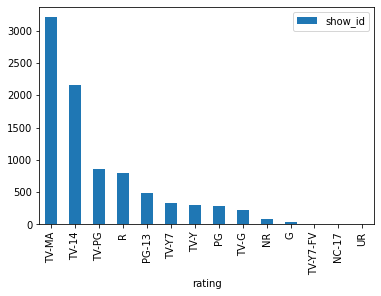

In [54]:
df_rating.plot(kind="bar")
plt.savefig("rating_distri.jpeg",bbox_inches="tight",dpi=1600)
files.download("rating_distri.jpeg")

In [55]:
import plotly.express as px

In [56]:
text = " ".join(review for review in df_init.genres.astype(str))

In [57]:
print(text)

Dramas Movies Kids' TV, TV Comedies Anime Series, International TV Shows Documentaries Classic Movies, Dramas Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Documentaries, Music & Musicals Children & Family Movies, Dramas Children & Family Movies, Dramas Children & Family Movies, Dramas Children & Family Movies, Dramas Classic Movies, Music & Musicals Children & Family Movies, Comedies Children & Family Movies, Comedies Children & Family Movies, Comedies Children & Family Movies, Comedies Children & Family Movies, Comedies Children & Family Movies, Comedies Documentaries, International Movies Children & Family Movies, Documentaries Children & Family Movies, Docume

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

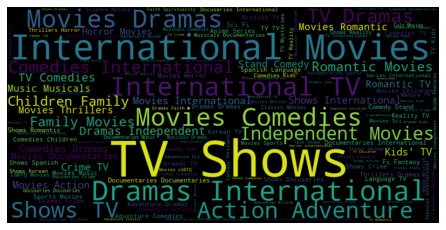

In [59]:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud,interpolation='bilinear')
plt.savefig("wordcloud.jpeg",bbox_inches="tight",dpi=3000)

plt.show()

In [ ]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genres        8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [ ]:
df_init["year_added"]=df_init["year_added"].astype(int)

In [ ]:
df_init.groupby("year_added").count()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
year_added,,,,,,,,,,,,
-1,10,10,10,0,10,9,0,10,10,10,10,10
2008,2,2,2,1,1,2,2,2,2,2,2,2
2009,2,2,2,2,2,2,2,2,2,2,2,2
2010,1,1,1,1,1,1,1,1,1,1,1,1
2011,13,13,13,13,13,13,13,13,13,13,13,13
2012,3,3,3,3,3,3,3,3,3,3,3,3
2013,11,11,11,7,11,11,11,11,11,11,11,11
2014,24,24,24,18,20,24,24,24,24,24,24,24
2015,82,82,82,57,73,79,82,82,82,82,82,82


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

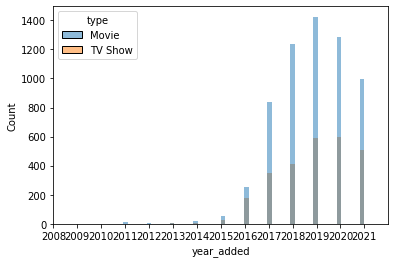

In [60]:
sns.histplot(data=df_init,x="year_added",hue="type")
plt.xlabel="Year Added"
plt.ylabel="Count"
plt.xlim(2008,2022)
plt.xticks(range(2008,2022))
plt.savefig("movie_tv_year.jpeg",bbox_inches="tight",dpi=1500)
files.download("movie_tv_year.jpeg")
plt.show()

As we can see from the above plot that there has been a steady increase in the content that has been added to the netflix, With 2019 being the largest addition to the library with more than 1400 Movies and around 600 TV shows.

In [61]:
df_years=df_init.groupby("year_added").count()  

In [62]:
df_years=df_years.drop(df_years.index[0])

In [63]:
df_years

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
year_added,,,,,,,,,,,,
2008.0,2,2,2,1,1,2,2,2,2,2,2,2
2009.0,2,2,2,2,2,2,2,2,2,2,2,2
2010.0,1,1,1,1,1,1,1,1,1,1,1,1
2011.0,13,13,13,13,13,13,13,13,13,13,13,13
2012.0,3,3,3,3,3,3,3,3,3,3,3,3
2013.0,11,11,11,7,11,11,11,11,11,11,11,11
2014.0,24,24,24,18,20,24,24,24,24,24,24,24
2015.0,82,82,82,57,73,79,82,82,82,82,82,82
2016.0,429,429,429,242,378,410,429,429,429,429,429,429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

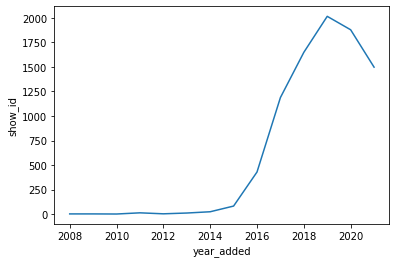

In [64]:
sns.lineplot(x="year_added",y="show_id",data=df_years)


In [65]:
df_list=df_init[['title','type','release_year','rating','genres','duration','description','country','director','cast','date_added']]

In [66]:
df_list[df_list["country"]=="India"]

,title,type,release_year,rating,genres,duration,description,country,director,cast,date_added
794,Asoka,Movie,2001,R,"Action & Adventure, Dramas, International Movies",168 min,This elaborate Bollywood epic dramatizes one m...,India,Santosh Sivan,"Shah Rukh Khan, Kareena Kapoor, Danny Denzongp...",2017-03-15
880,Revelations,Movie,2016,NR,"Dramas, International Movies",118 min,"After four years together, a husband and wife ...",India,Vijay Jayapal,"Chetan, Lakshmi Priyaa Chandramouli, Ananthara...",2017-03-01
894,Ugly,Movie,2013,NR,"Dramas, International Movies, Thrillers",125 min,When a 10-year-old goes missing while her fath...,India,Anurag Kashyap,"Rahul Bhat, Ronit Roy, Tejaswini Kolhapure, Vi...",2017-03-01
912,Fandry,Movie,2014,NR,"Dramas, Independent Movies, International Movies",102 min,"Spunky, lower-caste lad Jabya falls for lovely...",India,Nagraj Manjule,"Somnath Awghade, Suraj Pawar, Chhaya Kadam, Ki...",2018-01-01
913,INDIA,Movie,2014,NR,"Dramas, Independent Movies, International Movies",95 min,"A man buys a young girl, code-names her ""Doll""...",India,Sanjeev Gupta,"Heeba Shah, Ashwin Shukla, Muskaan, Aldan Shai...",2017-02-17
...,...,...,...,...,...,...,...,...,...,...,...
8691,Super Bheem Bana Vajraveer,Movie,2018,TV-Y7,Children & Family Movies,63 min,"Hoping to find a magical root, a monster has c...",India,Sumit Das,"Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sa...",2019-06-18
8727,Fukrey Boyzzz: Space Mein Fukrapanti,Movie,2020,TV-Y7,"Children & Family Movies, Comedies",75 min,After a foreboding dream about aliens comes tr...,India,Avinash Walzade,"Viraaj Modgill, Jasleen Singh, Pooja Punjabi, ...",2020-11-13
8765,Mighty Raju Rio Calling,Movie,2014,TV-Y7,"Children & Family Movies, Sports Movies",97 min,Mighty Raju preps for a new adventure in Rio d...,India,"Rajiv Chilaka, Anirban Majumder, Alka Amarkant...",None,2020-04-01
8782,Iqbal,Movie,2006,TV-Y7,"Dramas, Independent Movies, International Movies",127 min,A boy with a hearing and speech impairment – a...,India,Nagesh Kukunoor,"Shreyas Talpade, Naseeruddin Shah, Girish Karn...",2018-03-01


Choosing subset where country is INDIA

In [67]:
df_india=df_list[df_list["country"]=="India"]

In [68]:
df_india.reset_index()

,index,title,type,release_year,rating,genres,duration,description,country,director,cast,date_added
0,794,Asoka,Movie,2001,R,"Action & Adventure, Dramas, International Movies",168 min,This elaborate Bollywood epic dramatizes one m...,India,Santosh Sivan,"Shah Rukh Khan, Kareena Kapoor, Danny Denzongp...",2017-03-15
1,880,Revelations,Movie,2016,NR,"Dramas, International Movies",118 min,"After four years together, a husband and wife ...",India,Vijay Jayapal,"Chetan, Lakshmi Priyaa Chandramouli, Ananthara...",2017-03-01
2,894,Ugly,Movie,2013,NR,"Dramas, International Movies, Thrillers",125 min,When a 10-year-old goes missing while her fath...,India,Anurag Kashyap,"Rahul Bhat, Ronit Roy, Tejaswini Kolhapure, Vi...",2017-03-01
3,912,Fandry,Movie,2014,NR,"Dramas, Independent Movies, International Movies",102 min,"Spunky, lower-caste lad Jabya falls for lovely...",India,Nagraj Manjule,"Somnath Awghade, Suraj Pawar, Chhaya Kadam, Ki...",2018-01-01
4,913,INDIA,Movie,2014,NR,"Dramas, Independent Movies, International Movies",95 min,"A man buys a young girl, code-names her ""Doll""...",India,Sanjeev Gupta,"Heeba Shah, Ashwin Shukla, Muskaan, Aldan Shai...",2017-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...
967,8691,Super Bheem Bana Vajraveer,Movie,2018,TV-Y7,Children & Family Movies,63 min,"Hoping to find a magical root, a monster has c...",India,Sumit Das,"Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sa...",2019-06-18
968,8727,Fukrey Boyzzz: Space Mein Fukrapanti,Movie,2020,TV-Y7,"Children & Family Movies, Comedies",75 min,After a foreboding dream about aliens comes tr...,India,Avinash Walzade,"Viraaj Modgill, Jasleen Singh, Pooja Punjabi, ...",2020-11-13
969,8765,Mighty Raju Rio Calling,Movie,2014,TV-Y7,"Children & Family Movies, Sports Movies",97 min,Mighty Raju preps for a new adventure in Rio d...,India,"Rajiv Chilaka, Anirban Majumder, Alka Amarkant...",None,2020-04-01
970,8782,Iqbal,Movie,2006,TV-Y7,"Dramas, Independent Movies, International Movies",127 min,A boy with a hearing and speech impairment – a...,India,Nagesh Kukunoor,"Shreyas Talpade, Naseeruddin Shah, Girish Karn...",2018-03-01


In [69]:
df_india.groupby("type").size()

type
Movie      893
TV Show     79
dtype: int64

In [70]:
df_india.shape

(972, 11)

In [71]:
india_dist=df_india.groupby("type").count()

In [72]:
india_dist=india_dist[['title']]

In [73]:
india_dist=india_dist.rename(columns={'title':'count'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

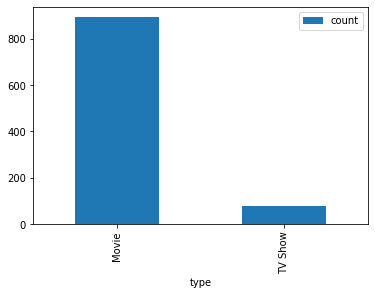

In [94]:
#india_dist.plot(kind="bar")
plt.savefig("movie_tv_india.jpeg",bbox_inches="tight",dpi=1500)

files.download("movie_tv_india.jpeg")

In [75]:
sorted_india=df_india.sort_values("date_added").reset_index()

In [76]:
sorted_india.head(10)

,index,title,type,release_year,rating,genres,duration,description,country,director,cast,date_added
0,6921,X: Past Is Present,Movie,2015,TV-MA,"Dramas, Independent Movies, International Movies",105 min,When a middle-aged filmmaker meets an alluring...,India,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...","Anshuman Jha, Rajat Kapoor, Pooja Ruparel, Pia...",2016-07-01
1,3044,John & Jane,Movie,2005,TV-14,"Documentaries, International Movies",79 min,Truth and fiction blend in this quasi-document...,India,Ashim Ahluwalia,None,2016-08-15
2,6920,Umrika,Movie,2015,TV-MA,"Dramas, Independent Movies, International Movies",96 min,An ambitious man leaves his small Indian villa...,India,Prashant Nair,"Suraj Sharma, Tony Revolori, Smita Tambe, Adil...",2016-10-01
3,5440,Harud,Movie,2010,TV-MA,"Dramas, International Movies",100 min,A young Kashmiri man sets out to escape to Pak...,India,Aamir Bashir,"Mohammad Amir Naji, Shahnawaz Bhat, Shamim Bas...",2016-10-01
4,6918,Mumbai Cha Raja,Movie,2012,TV-MA,"Dramas, Independent Movies, International Movies",77 min,"This coming-of-age tale follows Rahul, a young...",India,Manjeet Singh,"Rahul Bairagi, Arbaaz Khan, Tejas Parvatkar, D...",2016-11-15
5,3881,The Land of Cards,Movie,2012,TV-14,"Dramas, Independent Movies, International Movies",113 min,A royal prince arrives on an island of fascist...,India,Qaushiq Mukherjee,"Joyraj Bhattacharya, Rii, Soumyak Kanti DeBisw...",2016-11-22
6,6250,Interrogation,Movie,2015,TV-MA,"Dramas, International Movies, Thrillers",116 min,"In this fact-based drama, politically motivate...",India,Vetrimaaran,"Dinesh Ravi, Samuthirakani, Kishore Kumar, Ana...",2016-12-01
7,2701,1000 Rupee Note,Movie,2014,TV-14,"Dramas, International Movies",89 min,After randomly receiving a handsome political ...,India,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",2016-12-01
8,3880,The Violin Player,Movie,2016,TV-14,"Dramas, Independent Movies, International Movies",72 min,An unemployed Bollywood session violinist in M...,India,Bauddhayan Mukherji,"Ritwick Chakraborty, Adil Hussain, Nayani Dixi...",2016-12-01
9,3040,Famous in Ahmedabad,Movie,2015,TV-14,"Documentaries, International Movies",29 min,Follow an 11-year-old boy as he goes from ordi...,India,Hardik Mehta,None,2016-12-15


In [77]:
def counts(df, column):
    count_ = dict()
    for current in df[column]:
        names = current.split(",")
        for name in names:
            if name not in count_:
                count_[name] = 0
            count_[name] += 1
            
    df_count = {"name": [], "count": []}
    for key, value in count_.items():
        df_count["name"].append(key) 
        df_count["count"].append(value)
    return pd.DataFrame(df_count)


listed_df = counts(df_init, "genres")
listed_df = listed_df.sort_values("count", ascending=False)
listed_df

,name,count
12,International Movies,2624
0,Dramas,1600
17,Comedies,1210
15,Action & Adventure,859
6,Documentaries,829
...,...,...
51,Romantic Movies,3
71,Spanish-Language TV Shows,2
30,LGBTQ Movies,1
69,TV Sci-Fi & Fantasy,1


In [78]:
listed_df["name"]=listed_df["name"].astype(str)

In [79]:
listed_df["name"]=listed_df['name'].str.strip()

In [80]:
listed_df.groupby("name").sum()

,count
name,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


In [81]:
listed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 12 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    73 non-null     object
 1   count   73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [82]:
df_rating

,show_id
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [96]:
import plotly.express as px
df_plot=df_init
df_plot.head(2)
# So the below step is to create a new coloumn that can keep track of the count of each rating and thus can be used to plot pie chart
df_plot["count"]=1

df_plot
fig = px.pie(df_plot, values='count', names='rating')
fig.show()


In [99]:
fig.write_image("hello.jpg")
files.download()

TypeError: ignored

In [85]:
df_init["cast"]=df_init["cast"].fillna("NA")

In [86]:
listed_cast = counts(df_init, "cast")
listed_cast = listed_cast.sort_values("count", ascending=False)

In [87]:
listed_cast["name"]=listed_cast["name"].str.strip()

In [88]:
listed_cast=listed_cast.groupby("name").sum()

In [89]:

listed_cast=listed_cast.sort_values("count",ascending=False)

In [90]:
listed_cast=listed_cast.drop(listed_cast.index[0])

In [91]:
top10=listed_cast.head(10)

In [92]:
top10

,count
name,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

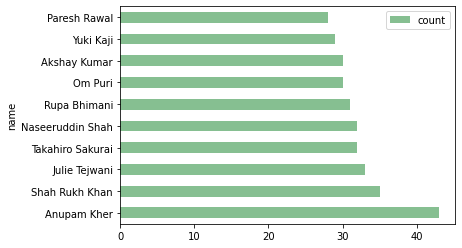

In [93]:
fig=top10.plot(kind="barh",color='#86bf91')
fig.figure.savefig("actors.jpeg",bbox_inches='tight',dpi=1600)
files.download("actors.jpeg")

In [102]:
df_init.groupby("country").sum().head(2)

,release_year,year_added,count
country,,,
", France, Algeria",2014,2021.0,1
", South Korea",2021,2021.0,1


In [104]:
df_init["country"]=df_init["country"].fillna("NA")

In [105]:

listed_country = counts(df_init, "country")
listed_country = listed_country.sort_values("count", ascending=False)
listed_country

,name,count
4,United States,3211
26,India,1008
1,NA,831
8,United Kingdom,628
7,United States,479
...,...,...
103,Guatemala,1
164,Montenegro,1
101,Uganda,1
100,Vatican City,1


In [109]:
listed_country["name"]=listed_country["name"].str.strip()

In [110]:
listed_country=listed_country.groupby("name").sum()

In [113]:
listed_country = listed_country.sort_values("count", ascending=False)

In [115]:
listed_country=listed_country.drop(listed_country.index[2])


In [118]:
topcountries=listed_country.head(15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

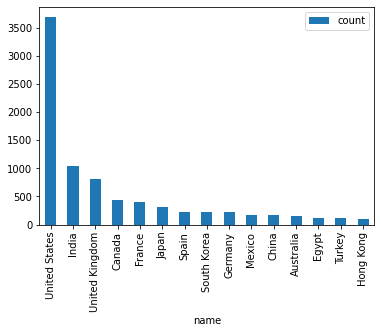

In [121]:
topcountries.plot(kind="bar")
plt.savefig("movie_tv_countries.jpeg",bbox_inches="tight",dpi=1500)

files.download("movie_tv_countries.jpeg")